# Writing a program to compute $\pi$

## Getting random

For a Monte Carlo method, we need a random number generator.

In [2]:
import random
random.random()

0.8137263349849096

Enter the following lines into Spyder's editor and run the file.

In [2]:
import random
print(random.random())

0.6542716249221561


When you're running a program, you have to tell Python when to `print`.

We'll need pairs of random numbers. We can put them into tuples. Try this program:

In [3]:
import random
a = (random.random(), random.random())
print(a)
print(a[0])
print(a[1])

(0.8906722613370666, 0.8624023536198429)
0.8906722613370666
0.8624023536198429


Actually, we're going to need _lots_ of random tuples...

...so let's rewrite the program

### Assignment #1

1. Import the `random` module
2. Define an empty list: `L = []`
3. Start a `for` loop with `range(10000)`
4. In the loop, use `L.append()` to add random tuples to `L`
5. After the loop, print the last member of `L`
6. _Extra credit:_ print the length of `L`

### Answer to assignment #1

In [4]:
import random
L = []
for i in range(10000):
  L.append((random.random(), random.random()))
print(L[-1])
print(len(L))

(0.9141208455640527, 0.33665846842681857)
10000


### Assignment #2

- Click on `random()` in Spyder's editor and type Alt-i or Cmd-i
  - The help pane contains the same info as `help(random.random)`
  - What kind of random numbers are we getting?
- We want uniform random numbers in the interval (-1,+1)
- **Modify the body of the loop to multiply and shift the random numbers**

### Answer to assignment #2

In [5]:
import random
L = []
for i in range(10000):
  L.append((2*random.random()-1, 2*random.random()-1))
print(L[-1])
print(len(L))

(-0.3588265620779476, -0.8266254895591438)
10000


## Functions

We are going to split our program into a function followed by a main program.

### Why functions?

- They give organization and structure to your code
- They can be tested and verified separately ("unit testing")
- They help you build your program incrementally

- _Alternative:_ define a class with methods (also good, but more complicated)

### What should go in a function?

- A group of statements that achieves a single goal or result
- The goal should be identifiable and separable (easy to name!)
- The goal should also be natural and logical (not too trivial or too huge)

- _Note:_ A function may call other functions to do sub-tasks.

### Assignment #3

_Try it!_ Use this template to split your program into a function and a main program.

In [12]:
import random

def make_list_of_random_coords():
    L = []
    # loop to populate list
    return L

if __name__ == '__main__':
    darts = make_list_of_random_coords()
    print(type(darts), len(darts))

<class 'list'> 0


### Assignment #4

Add a parameter `n` to the function, and call it with an argument as shown.

In [7]:
import random

def make_list_of_random_coords(n):
    L = []
    # loop with range(n) to populate list
    return L

if __name__ == '__main__':
    darts = make_list_of_random_coords(10000)
    print(type(darts), len(darts))

<class 'list'> 0


### Answer to assignments #3 and #4

In [13]:
import random

def make_list_of_random_coords(n):
    L = []
    for i in range(n):
        L.append((2*random.random()-1, 2*random.random()-1))
    return L

if __name__ == '__main__':
    darts = make_list_of_random_coords(10000)
    print(type(darts), len(darts))

<class 'list'> 10000


### Adding a function

We need a second function to tell us which coordinate pairs fall inside the unit circle.

### What kind of function do we need?

- Input is our list of random samples
- Output could be just a count of how many are in the unit circle...
- But we'll want to know which points are in or out, so we can plot them later

### Assignment #5

Define a second function, `unit_circle_check(L)`, which should:
1. Create an empty list U
2. Loop over coordinate pairs P in input list L:
  - Compute the distance from (0,0) to P
  - Test if the distance is is less than 1
  - Append the result of the test to U
  - See if you can do all that in one line
3. Return U 

### Answer to assignment #5

In [14]:
def unit_circle_check(L):
    U = []
    for P in L:
        U.append(((P[0]*P[0] + P[1]*P[1])**0.5)<1)
    return U

## Testing

It's an essential part of code development.

### How do we know if our new function works?

- _We don't!_ The only way to tell is to test
- _Expect errors!_ Diagnose, fix, test again
- We can add temporary code to `__main__` to run the test
- In a production code, this would be saved as a **unit test**

### Assignment #6

At the end of the main program, add code that:
1. Creates a short list of fixed coordinate pairs
2. Calls `unit_circle_check` with the short list
3. Prints the return values for inspection

_Suggestion:_ Try removing the `< 1` from the function so it just returns distances

### Answer to assignment #6

In [10]:
# previous function can stay here

def unit_circle_check(L):
    U = []
    for P in L:
        U.append(((P[0]*P[0] + P[1]*P[1])**0.5)<1)
    return U

if __name__ == '__main__':
    # previous code can stay here
    
    few_darts = [(0.3,0.4),(-1,-1)]
    hits = unit_circle_check(few_darts)
    print(hits)

[True, False]


### At this point, we have what we need to compute $\pi$. Can we do it?

Put this in `__main__` to find out:

In [16]:
if __name__ == '__main__':
    darts = make_list_of_random_coords(10000)
    hits = unit_circle_check(darts)
    pi_approx = 4 * hits.count(True) / len(hits)
    print("pi_approx = ", pi_approx)

pi_approx =  3.1296


Not a great approximation. Did we do something wrong?

### More testing!!

- Quick tests are good for fixing obvious errors
- However, it's also good to do extensive tests for many inputs
- We can't look at all this output as text, but we can plot results...

Visualization and testing often go together!

## Visualizing output

We can use matplotlib to make a scatter plot, after rearranging the output with NumPy.

In [12]:
# this is just for me
%matplotlib inline

### Numpy has useful tools for wrangling data

- `numpy.array()` lets you create a NumPy array from array-like data types
- `numpy.where()` lets you select data from an array according to a condition

This shows how to make a 2D array from a list of tuples, and then slice it into two 1D arrays.

In [7]:
import numpy as np
b = np.array([(1,2),(3,4),(5,6)])
x = b[:,0]
y = b[:,1]
print(x,y)

[1 3 5] [2 4 6]


Then we can select points in the x and y lists according to some condition.

In [10]:
import numpy as np
b = np.array([(1,2),(3,4),(5,6)])
x = b[:,0]
y = b[:,1]
print(x,y)

selected_points = np.where(x+y>3)
print(x[selected_points],y[selected_points])

[1 3 5] [2 4 6]
[3 5] [4 6]


### Assignment #7

Prepare for plotting by putting these tricks in the program. (Yes, just type it in.)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random
# functions go here

if __name__ == '__main__':
# main program with pi computation goes here
    
    d_arr = np.array(darts)
    x = d_arr[:,0]
    y = d_arr[:,1]
    h_arr = np.array(hits)

And finally, make a plot!

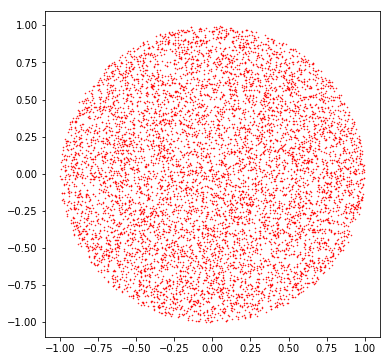

In [18]:
    plt.rcParams['figure.figsize'] = (6,6)
    plt.scatter(x[np.where(h_arr)], y[np.where(h_arr)], s=1, c='r', marker='.')

### Assignment #8

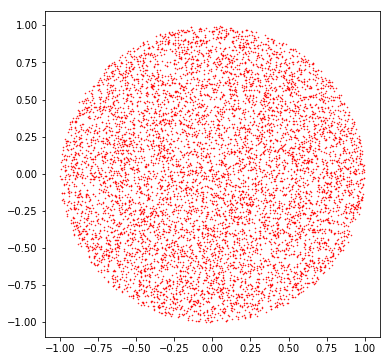

In [19]:
    plt.rcParams['figure.figsize'] = (6,6)
    plt.scatter(x[np.where(h_arr)], y[np.where(h_arr)], s=1, c='r', marker='.')
    # Call plt.scatter again to add points that are outside the unit circle, in blue.
    # Note, in NumPy, you can use ~ (tilde) to negate an array of booleans

### Answer to assignment #8

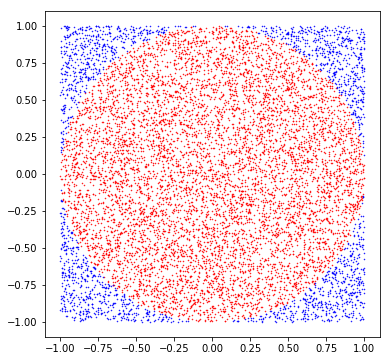

In [20]:
    plt.rcParams['figure.figsize'] = (6,6)
    plt.scatter(x[np.where(h_arr)], y[np.where(h_arr)], s=1, c='r', marker='.')
    plt.scatter(x[np.where(~h_arr)], y[np.where(~h_arr)], s=1, c='b', marker='.')

The plot indicates that the coordinate pairs are valid, and `unit_circle_check` works correctly...

It looks like we just need a lot more samples to get a good approximation to $\pi$.

Maybe we should have been using NumPy from the beginning?